---
license: CC-BY-4.0
github: https://github.com/jamasole/Curso-TalentQ-Jupyterlab
subject: Curso
venue: Quantum Spain
authors:
  - name: Javier Mas
    email: javier.mas@usc.es
    corresponding: true
    orcid: 0000-0001-7008-2126
    affiliations:
      - IGFAE-USC
  - name: David Castaño
    email: david.castano@uma.es
    corresponding: true
    orcid: 0000-0001-7008-2126
    affiliations:
      - UMA
math:   
    '\i': '{i}'
    '\bes': '\begin{equation*}'
    '\ees': '\end{equation*}'
    '\O': '{\mathcal O}'
    '\Lin': '\rm L'
    '\Hil': '{\mathcal H}'
    '\braa': '{\langle #1|}'
    '\ket': '{|#1\rangle}'
    '\braket': '{\langle #1|#2\rangle}'
    '\ketbra': '{|#1\rangle\langle #2|}'
    '\tr': '{\rm tr}'
    '\R': '{\mathbb R}' 
    '\C': '{\mathbb C}'
    '\V': '{V}'
---

```{figure} ../thumbnails/myThumbnail.png
:align: center
```

# Operadores I

In [2]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

## Operadores y Matrices

En un espacio vectorial, además de los **vectores**, será esencial entender las **transformaciones** de estos elementos entre sí. 


:::{card}
**Definición**: *operador lineal*

^^^

Un <i>operador lineal</i>  transforma <u>todo vector en otro</u> 

$$
A: \ket{u} ~~\to ~~ \ket{v}   
$$
:::


El apelativo lineal es una condición extremadamente útil, que indica cómo se transforma un vector que es combinación lineal de otros dos

$$
A: \big(\alpha\ket{u} + \beta\ket{w}\big)~~\to ~~ \ket{v} =\alpha A\ket{u} + \beta A\ket{w}
$$ 

:::{admonition} Notación
:class: note

Escribimos también $\ket{v} = A\ket{u} \equiv \ket{Au}$ $~~$ donde $Au=v$ deben entenderse como la etiqueta sinónimas del vector imagen

:::

:::{admonition} Ejemplo
:class: tip

Un <i>operador</i>  fácil de visualizar es el operador de <i>rotación en un plano</i>. Dado un ángulo $\theta \in (0,2\pi)$ el operador $A = R(\theta)$ gira cualquier vector un ángulo $\theta$ en el sentido antihorario

Un vector en  ${\bf u} =  (u_1,u_2)\in {\mathbb R}^2$  es equivalente al número complejo $u = u_1 + i u_2 \in {\mathbb C}$.

    
Escrito en polares, $u=|u|e^{i\phi}$, y sabemos que una rotación de ángulo $\theta$ es equivalente a añadirle dicho  ángulo a la fase 

$$
 v = R(\theta) u = |u| e^{i(\phi + \theta)} =  |u| e^{i\phi } e^{i\theta} = u\cdot e^{i\theta} 
$$
    
Por tanto, rotar un número complejo un ángulo $\theta$ se corresponde con la acción el operador $R(\theta)$
que multiplica cualquier número complejo por la fase $e^{i\theta}$.

    
    
La propiedad fundamental de una rotación es la de mantener invariante el módulo  $|v| = |u|$.    

:::

::::{admonition} Ejercicio
:class: tip

Usando el ejemplo anterior, define una función $R$ en python, que recibe un vector en el plano $(u_1,u_2)$ y devuelve el vector $(v_1,v_2)$ de componentes rotadas un ángulo $\theta$.


:::{dropdown} Solución

```{code-block} python
def R(u1,u2,theta):
   u = u1 + u2*1j
   v = u*np.exp(1j*theta) # u rotado un angulo theta
   return v.real,v.imag
```
:::
::::
 

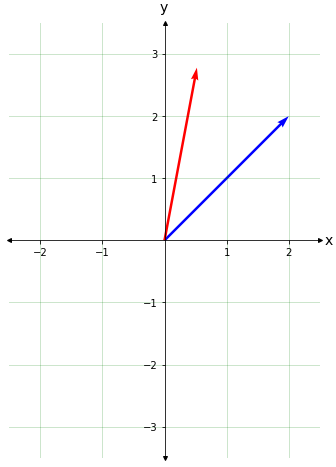

In [4]:
'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.

#'''v1 y v2 a partir de u1, u2 y theta'''
#def R(u1,u2,theta):
#        u = u1 + u2*1j
#        v = u*np.exp(1j*theta) # u rotado un angulo theta
#        return v.real,v.imag
    
v1,v2 =  R(u1,u2,theta)

''' Representación en el plano complejo '''
v = v1**2+v2**2
tQ.plot_2D_plane(left=-int(abs(v1))-2,right=int(abs(v1))+2,up=int(abs(v2))+1,down=-int(abs(v2))-1)
tQ.draw_vector(u1,u1,vcolor='b')
tQ.draw_vector(v1,v2,vcolor='r')


### Matriz de un operador
<a id='matriz_op'></a>

*Dada una base* $\ket{i}$ sabemos que:

$\Rightarrow $  un vector queda especificado por una *columna de números* 

$$
\ket{v} \sim \begin{pmatrix} v_1 \\ v_2\\ \vdots \\ v_N\end{pmatrix}
$$


$\Rightarrow $  un operador queda definido por una *matriz de números*. 

$$
A \sim \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
$$


En ambos casos, los números son las **componentes** en una base. 

Efectivamente, en una base, la relación $\ket{v} = A\ket{u}$ equivale a una ecuación que relacione las componentes de ambos vectores
$$
v_i = \sum_{j=1}^N A_{ij} u_j  \, .
$$

Esta operación se corresponde con la siguiente *multiplicación de matrices*

$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix} 
$$

:::{admonition} Ejemplo
:class: tip

Continuando con el ejemplo del operador de rotación en un plano, hemos visto que las componentes de $u = u_1 + i u_2$ y las de $R(\theta)u = v = v_1 + i v_2$ se obtienen mediante la multiplicación por una fase pura 

\begin{eqnarray}
v&=& u e^{i\theta} \\
\end{eqnarray}
    
Vamos a desarrollar cada miembro en cartesianas, separando las partes real e imaginaria
    
\begin{eqnarray}
v_1 + i v_2 &=& (u_1 + iu_2) (\cos \theta + i \sin \theta)  \\
    \rule{0mm}{6mm}
    &=& (\cos\theta \, u_1 - \sin \theta\,  u_2) + i(\sin\theta\,  u_1 + \cos \theta\,  u_2)
\end{eqnarray}
   
es decir las coordenadas del vector origen y el vector rotado imagen se relacionan en la  forma 
\begin{eqnarray}
v_1 = \cos\theta \, u_1 - \sin \theta\,  u_2 ~~~~~~~,~~~~~~~~
v_2 = \sin\theta \, u_1 + \cos \theta\,  u_2     
\end{eqnarray}
que podemos expresar en forma matricial
    
$$
\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta &\cos\theta\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$    
:::

$\Lin(\Hil)$ es por tanto, un espacio vectorial cuyos vectores son los operadore lineales sobre $\Hil$. Como para cualquier espacio vectorial, para describir los operadores $A$,  necesitamos una base. 

Resulta que, como vamos a ver, una base $\{ \ket{i}\}$ para describir los vectores  de $\ket{v}\in \Hil$ nos permite definir una base para los operadores $A \in \Lin(\Hil)$ de forma natural. 

Para verlo vamos a definir dos formas de componer dos vectores de $\ket{u},\ket{v} \in \Hil$: el producto interno, y el producto externos. 

##   El Espacio Vectorial  $\Lin(\Hil)$ 

El <i>conjunto</i> de **todos** <i>los operadores lineales</i> sobre un espacio vectorial $\Hil$ tiene, de forma natural, una estructura de espacio vectorial que denominamos $\Lin(\Hil)$

En efecto, dados dos operadores,  $A$ y $B$ tanto la suma $C = A+B$ como la multiplicación por un número complejo $D=\lambda A$ son *nuevos operadores* definidos por su acción sobre un vector cualquiera $\ket{v}\in \Hil$

$$
C\ket{v} ~=~ (A + B) \ket{v} = A\ket{v} + B\ket{v}
$$

$$
D\ket{v} ~=~ (\lambda A) \ket{v} = \lambda (A\ket{v})
$$

El elemento neutro es el operador que aniquila cualquier vector

$$
(A + 0)\ket{u} = A\ket{u} + 0\ket{u} = A\ket{u} + 0 = \ket{v}
$$

### Producto externo

$\Lin(\Hil)$ es por tanto, un espacio vectorial cuyos vectores son los operadore lineales sobre $\Hil$. Como para cualquier espacio vectorial, para describir los operadores $A$,  necesitamos una base. 

Resulta que, como vamos a ver, una base $\{ \ket{i}\}$ para describir los vectores  de $\ket{v}\in \Hil$ nos permite definir una base para los operadores $A \in \Lin(\Hil)$ de forma natural. 

Para verlo vamos a definir dos formas de componer dos vectores de $\ket{u},\ket{v} \in \Hil$: el producto interno, y el producto externos. 



- El **producto interno**, o *producto escalar* es un *número complejo*

$$
 a = \braket{u}{v} = \braket{v}{u}^* 
$$

- El **producto externo**  es un *operador*

$$
A = \ketbra{v}{u}
$$

Para comprender <u>por qué el producto externo es un operador</u>, observamos que dicha expresión aplicada a un vector $\ket{w}$ da otro, <br>

$$
A : \ket{w} ~\to ~ A\ket{w} =  \ket{v}\braket{u}{w}=\ket{v} b  = b \ket{v} 
$$ 

:::{admonition} Nota
:class: note

- El *orden* en que escribimos las cosas es *muy* relevante.
    - $\braket{u}{v}$ y $\ket{v}\!\bra{u}$ son objetos <i> radicalmente distintos</i>: el primero es un número y el segundo es un operador. 

    - En cambio $\ket{v} b  = b \ket{v}$, así como $\bra{u}b = b\bra{u}$, es decir,  los números complejos  pueden escribirse en cualquier posición (decimos que <i>conmutan con todo</i>).

- La acción del operador  $A = \ket{v}\bra{u}$ es muy fácil de *expresar con palabras*: 
<br>  
    - el operador $A$ toma <i>cualquier vector</i> $\ket{w}$ y lo convierte en un vector <i>paralelo</i> a $\ket{v}$ proporcionalmente a su proyección $b=\braket{u}{w}$. 
<br>    
    - si la proyección es nula $a=0$, el operador <i>aniquila</i>, es decir, da el elemento neutro.
:::

**En componentes**

La diferencia entre el *producto interno* $a=\braket{u}{v}$ y el *externo* $A=\ketbra{u}{v}$ tiene su reflejo en una base expresando ambos vectores, $\ket{u} = \sum_i u_i\ket{i}$ y $\ket{v} = \sum_j v_j \ket{j}$,  en componentes en una base ortonormal

-  el *número complejo* $a$  es el *producto escalar*
  
$$
 a = \braket{u}{v}  = \begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix}
\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}\, =  \sum_i u_i^*v_i
$$

-  la matriz $A_{ij}$    *representa* el operador $A$ en la base $\{\ket{i}\}$

$$
A = \ketbra{v}{u} ~\sim ~\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}
\begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix} ~=~ 
\begin{pmatrix} v_1 u_1^* & v_1u_2^* & ... & v_1 u_N^* \\
v_2 u_1^* & v_2 u_1^*& ... & v_2 u_N^* \\ \vdots & \vdots  & \ddots & \vdots \\
v_N u_1^* & & ... & v_N u_N^* \end{pmatrix} ~ = ~A_{ij}
$$

### Base canónica de operadores
<a id='base_canonica'></a>

Consideremos el *producto externo* de dos elementos de la base ortonormal
$\ketbra{i}{j}$

- La acción de $\ketbra{i}{j}$ sobre otro vector, $\ket{k}$,  de la base es sencilla 

$$
 \ket{i}\braket{j}{k} = \ket{i} \delta_{jk} = \left\{ \begin{array}{rl}
0 & {\rm si} ~~k\neq j \\ \ket{i} & {\rm si} ~~ k=j \end{array} \right.
$$

- La matriz asociada al operador  tiene sólo un 1 en el elemento $(ij)$ y cero en todos los demás. Por ejemplo, supongamos que 
$N=4$ 

<br>

$$
\ketbra{2}{3} ~\to ~~
 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\begin{pmatrix} 0 & 0 & 1 & 0 \end{pmatrix} = 
\begin{pmatrix}
0 &  0 & 0 &  0 \\  0 &  0 & 1&  0 \\ 0 &  0 & 0 &  0 \\ 0 &  0 & 0 &  0
\end{pmatrix} ~~\Rightarrow ~~ A_{ij} = \delta_{i2}\delta_{j3}
$$

<br>


Los <i>elementos de matriz</i> $A_{ij}$ expresan las <i>componentes de un operador</i> en la <b>base de operadores</b> $\ketbra{i}{j}$


$$
A ~=~ \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} 
$$

:::{dropdown} Consistencia
Verifiquemos que actúa de la forma correcta

$$
\begin{array}{rcl}
A |u\rangle &=&  \sum_{i,j} A_{ij} \ketbra{i}{j}  \left(\sum_k u_k |k\rangle \right) \\
&\stackrel{\rm linealidad}{=} \rule{0mm}{6mm}& \sum_{i,j} \sum_k A_{ij} | i\rangle  \,   u_k \langle j| k\rangle \nonumber\\
&\stackrel{\rm ortonormalidad}{=}\rule{0mm}{6mm}& \sum_{i,j,k} A_{ij} | i\rangle  \,   u_k \delta_{jk}\\
&=\rule{0mm}{6mm}&\sum_{ij} A_{ij}\,|i\rangle \, u_j= \sum_i \left(\sum_{j} A_{ij}\, u_j\right)  |i\rangle    \\
&=\rule{0mm}{6mm}&\sum_i v_i \ket{i} \nonumber\\
&=\rule{0mm}{6mm}&   | v\rangle
\end{array}
$$
:::

### Elementos de matriz

De la misma manera que obteníamos las componentes de un vector proyectando sobre un elemento de la base

$$
v_i = \braket{i}{v}
$$

ahora podemos obtener los *elementos de matriz* de un operador $A$ en la forma

$$  A_{ij} = \bra{i} A \ket{j} $$

:::{admonition} Ejercicio
:class: tip

Comprueba la consistencia de las expresiones $~A = \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} $ y $~A_{ij} = \bra{i} A \ket{j}$
<details>
    <summary><p style="text-align:left"> >> <i>Solución:</i> </p></summary>

aquí tu solución
:::

:::{admonition} En resumen
:class: attention

En una base $\{\ket{i}\}$ podemos siempre relacionar una matriz con un operador. La relación concreta es de matriz a  operador: $A_{ij} \to ~ A = \sum_{ij} A_{ij}\ketbra{i}{j}$ de operador a  matriz: $A \to ~ A_{ij} = \bra{i}A\ket{j}$
:::

### Cambio de base 

Dos bases ortonormales $\ket{e_i}$ y $\ket{\tilde e_i}$ se relacionadas linealmente mediante una matriz

$$ \ket{e_j} \to \ket{\tilde e_j} = \sum_{ij}U_{ij} \ket{e_i}$$


Tomar la conjugación *adjunta* de esta expresión es muy sencillo usando las reglas

$$ \bra{e_j} \to \bra{\tilde e_j} = \sum_{ij}U^*_{ij} \bra{e_i}$$




En cada base, un operador $A$ *se representa* mediante elementos de matriz distintos

$$
 A_{ij} = \bra{e_i} A \ket{e_j} ~~~~,~~~~~ \tilde A_{ij} = \bra{\tilde e_i} A \ket{\tilde e_j} \, .
$$



Podemos encontrar la relación sustituyendo el cambio de base

\begin{eqnarray}
\tilde A_{ij} &=& \bra{\tilde e_i} A \ket{\tilde e_j} \\ \rule{0mm}{8mm}
&=& \sum_{k}U^*_{ki}\bra{e_k} ~A~ \sum_l U_{lj}\ket{e_l} \\ 
&=&  \sum_{k,l} U^\dagger_{ik}\bra{e_k} A  \ket{e_l}U_{lj}   = \sum_{k,l} U^\dagger_{ik}A_{kl} U_{lj} \, .
\end{eqnarray}

:::{card} 
**Lema**

^^^

Bajo un cambio de bases ortonormales $ \ket{e_j} \to \ket{\tilde e_j} = \sum_{i}U_{ij} \ket{e_i}$ las componentes de un vector $\ket{v}$ y de  un operador $A$ cambian siguiendo la regla:
<br>      
\begin{eqnarray}
\tilde v_i &=& (U^\dagger \cdot v)_i \\ 
\tilde A_{ij} &=& (U^\dagger \cdot A \cdot U)_{ij}
\end{eqnarray}
:::

:::{admonition} Nota
:class: note

La regla *memotécnica* es que las columnas se multiplican por $U^\dagger\cdot$ y las filas por $\cdot\, U$

$$
\begin{pmatrix} \tilde v_1 \\ \vdots \\ \tilde v_N \end{pmatrix} = 
U^\dagger \cdot \begin{pmatrix} v_1 \\ \vdots \\  v_N \end{pmatrix} ~~~~
~~~~~~~;~~~~~~~~
\begin{pmatrix} 
\tilde A_{11} & \cdots & \tilde A_{1N} \\
\tilde \vdots & \ddots & \vdots  \\
\tilde A_{N1} & \cdots & \tilde A_{NN} 
\end{pmatrix} 
 =  U^\dagger\cdot
 \overbrace{\begin{pmatrix} 
 A_{11} & \cdots &  A_{1N} \\
\tilde \vdots & \ddots & \vdots  \\
 A_{N1} & \cdots &  A_{NN} 
\end{pmatrix} }^{\large \cdot ~ U}
$$
:::

:::{admonition} **Ejercicio** (*explícaselo a tu ordenador*)
:class: tip

Escribe una función en python, $basis\_change$, que reciba una matriz $U_{ij}$ de cambio de base $\ket{\tilde e_j} = \sum_i{U_{ij}}\ket{e_i}$, la componentes $v_i$ de un vector, ó $A_{ij}$ de un operador, y devuelva las componentes $\tilde v_i~$ ó $~\tilde A_{ij}$ en la nueva base. 
:::    

:::{admonition} **Ejercicio** 
:class: tip
La matriz $\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}$ representa un operador $\sigma_y$ en la base $\{ \ket{0},\ket{1}\}$. Utilizando la función *basis\_change*, escribe $\sigma_y$ en la nueva base $\{\ket{\!+\!i}= \frac{1}{\sqrt{2}}(\ket{0}+i \ket{1})~,~\ket{\!-\!i}= \frac{1}{\sqrt{2}}(\ket{0}-i \ket{1})\}$
:::

### Relación de completitud    
    
La acción del operador identidad es 

$$
I\ket{v} = \ket{v}
$$

En particular sobre todo elemento de la base $I\ket{i} = \ket{i}$. En otras palabras,
el operador identidad $I$ tiene por matriz $I_{ij}=\delta_{ij}={\rm diagonal}\, (1,1,...,1)$ con lo que
<br>

$$
I = \sum_{i}  \ketbra{i}{i}= \sum_{ij} \delta_{ij}\ketbra{i}{j} 
$$

Esta expresión se conoce también como <b>relación de completitud</b> o, también, <b>relación de cierre</b> y se utiliza muy frecuentemente.


La relación de completitud es una propiedad de <b> cualquier base</b>. Dicho de otro modo, si $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$ son, ambas, bases entonces $I\ket{e_i} = \ket{e_ i}$ y $I\ket{\tilde e_j} = \ket{\tilde e_j}$.
Esto quiere decir que, en cualquier base, la matriz que representa la identidad es la matriz diagonal $\delta_{ij}$
<br>

$$
I =  \sum_{i}  \ketbra{e_i}{e_i} =  \sum_{j}  \ketbra{\tilde e_j}{ \tilde e_j}\, .
$$


La relación de cierre, o completitud,  siempre **se puede insertar** en cualquier momento del cálculo. Se utiliza con frecuencia para efectuar cambios de base.

Por ejemplo, 

\begin{eqnarray}
\ket{\tilde e_j} ~&=&~ \left(\sum_i \ketbra{e_i}{e_i}\right) \ket{\tilde e_j} \nonumber\\
&=&\sum_i \braket{e_i}{\tilde e_j} \ket{e_i} \nonumber\\
&=&\sum_i U_{ij}\ket{e_i}
\end{eqnarray}

Donde la matriz de cambio de base es
$$
U_{ij} = \braket{e_i}{\tilde e_j}
$$

### Operador Adjunto
<a id='opadj'></a>

    
La *conjugación adjunta* definida sobre $\Hil$ puede extenderse a $\Lin(\Hil)$
<br><br>

$$
\dagger ~\to ~
\left\{
\begin{matrix}
z & \leftrightarrow  &  z^* \\
|u\rangle & \leftrightarrow &   \langle u | \\
A & \leftrightarrow & A^{\dagger}
\end{matrix}
\right. \hspace{5cm}
$$
<br>

y hay <b>dos reglas más</b> que permiten aplicar $\dagger$ a sumas y productos de <i> objetos </i> $a \in\{z,\ket{u},A\}$
<br>

- *linealidad* $( a + b)^\dagger = a^\dagger + b^\dagger $
<br>

- *trasposición* $(ab)^\dagger = b^\dagger a^\dagger$ (sólo relevante cuando $a$ y $b$ no sean C-números que conmutan)
<br>

:::{admonition} **Ejemplos**
:class: tip


1. $\ket{v} = A\ket{u} ~~~~\Leftrightarrow ~~~~\bra{v} = \bra{u}A^\dagger
~~$ donde el operador en la derecha actúa sobre el *bra* a su izquierda.
Notar que, como $\ket{v}^\dagger=\ket{Au}^\dagger = \bra{Au}$ la ecuación anterior implica

$$
\bra{Au} = \bra{u} A^\dagger
$$

2. $\bra{w}A\ket{u}^* = \big(\bra{w}A\ket{u}\big)^\dagger = \bra{u}A^\dagger\ket{w}$
:::


### Matriz adjunta

Estas reglas nos permiten obtener el adjunto de un operador


<br>


$$
A^\dagger = \sum_{ij}\left( A_{ij}\ketbra{i}{j}\right)^\dagger = \sum_{ij} \, \ketbra{j}{i}A_{ij}^* =  \sum_{ji} \, A_{ji}^*\ketbra{i}{j}
$$

donde en la última ecuación hemos hecho un simple intercambio de etiquetas $i\leftrightarrow j$
<br>
<br>

Vemos que la matriz que representa $A^\dagger$ es la *matriz adjunta* de $A_{ij}$, es decir, la traspuesta y conjugada
<br>


$$
(A^\dagger)_{ij} = A^*_{ji} = (A^{*}_{ij})^t \equiv (A_{ij})^\dagger
$$

donde $^\dagger$ significa el adjunto de un operador a la izquierda, y de una matriz a la derecha.


In [61]:
A = np.array([[1,1+2j],[2+3j,3-1j]])
display(array_to_latex(A))

Aadj = A.T.conj()
display(array_to_latex(Aadj))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Si $\Hil$ tiene dimensión $N$, un *operador general* $A\in \Lin(\Hil)$ se especifica mediante una matriz de $N^2$ números complejos $\Rightarrow A = A_{ij}\ket{e_i}\bra{e_j}$. 

$N^2$ números complejos equivalen a $2N^2$ números reales. 


En otras palabras: $A$  tiene $N^2$ grados de libertad complejos y, por tanto, ésta es la dimension del espacio ${\rm L}(\Hil)$ es  
<br>

$$ {\rm dim}_{\bf C}(\Lin(\Hil)) = N^2 ~~~ \Longleftrightarrow ~~~ {\rm dim}_{\bf R}(\Lin(\Hil)) =  2N^2
$$
<br>

## Clases de Operadores
<a id='classop'></a>

In [2]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

Vamos a considerar **clases de operadores** que satisfagan algún tipo de *condición* o *restricción*

### Operador Unitario

:::{card} 
**Definción**: *operador unitario*

^^^

Un <i>operador unitario</i> $U$ es tal que su <i>adjunto</i> es igual a su <i>inverso</i>


$$
U^\dagger = U^{-1}  \, 
$$
:::

Naturalmente, esta ecuación se traduce en la misma ecuación para las matrices asociadas en *cualquier base*
<br>
<br>
$$
(U_{ij})^\dagger = U_{ji}^* = U^{-1}_{ij}
$$
<br>
Veamos ahora por qué hemos definido esta clase de operadores.

::::{card} 

**Teorema**

^^^

La acción de un operador unitario <i>preserva </i> el producto escalar de dos vectores cualesquiera. 

:::{dropdown} Demostración

Sea $U$ un operador unitario, y $\ket{\varphi'}=U\ket{\varphi}$ y $\ket{\psi'} = U\ket{\psi}$
dos vectores transformados por $U$, entonces

$$
\braket{\varphi'}{\psi'} = \left(\bra{\varphi}U^\dagger\right)U\ket{\psi} = \bra{\varphi} U^\dagger U \ket{\psi} = 
\braket{\varphi}{\psi}
$$

particularizando para $\ket{\varphi} = \ket{\psi}$ tenemos que un operador unitario *conserva la norma*.

$$
\|U \ket{\varphi}\| = \|\ket{\varphi}\|
$$
:::


- En particular, preserva  la <i>norma</i> de cualquier vector. 
<br>
Por tanto, conserva la <i>distancia</i> entre dos vectores $ d (\ket{v},\ket{w})= \| (\ket{v}-\ket{w}) \| $.<br>
En un lenguaje más formal, se dice que un operador unitario es una *isometría* 

- La <i>combinación lineal</i> de operadores unitarios **no es** unitaria
<br>
<br>
$$
 (a U+ bV)^\dagger = a^* V^\dagger+ b^* U^\dagger = a^* V^{-1}+ b^* U^{-1} \neq  (a U+ b V)^{-1}
$$
<br>
Matemáticamente esto quiere decir que los operadores unitarios no forman un subespacio vectorial de $\Lin(\Hil)$


- La *composición* de  operadores unitarios  **sí es** unitaria
<br>
<br>
$$
(UV)^\dagger = V^\dagger U^\dagger = V^{-1}U^{-1} = (UV)^{-1} 
$$
<br>
Matemáticamente esto quiere decir que los operadores unitarios forman un <i>grupo</i>: el <i>grupo unitario</i> $U(d)$ actúa sobre $\Hil$ de dimensión $d$. 
    

- Aun así, forman una *variedad*: un conjunto continuo  que se puede parametrizar mediante una colección de parámetros, la *dimensión de la variedad*.
<br>
Como hay una relación 1 a 1 entre un operador una matriz (en una base), esa dimensión será igual a la *dimensión del conjunto de matrices unitarias* 



:::{admonition} **Ejercicio** *(explícaselo a tu cuaderno)*
:class: tip
   
Resta de  ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ el número de ecuaciones que restringen la matriz de un operador 
unitario y halla así la  dimensión (real) del grupo $U(N)$ de <i> operadores unitarios</i> de dimensión $N$.
:::

**Bases ortonormales**

- Como caso particular, aplicando un operador unitario $U$ a una base ortonormal $\{\ket{e_i}\}$ obtenemos otra base ortonormal $\{\ket{\tilde e_i}\}$
<br>

$$
\left. \begin{array}{c}\ket{\tilde e_i} = U\ket{e_i}\\ U^{-1} =  U^\dagger \end{array} \right\}
~~~~ \Longleftrightarrow ~~~~\braket{\tilde e_i}{\tilde e_j} = \bra{\tilde e_i}U^\dagger U\ket{\tilde e_j} = \braket{e_i}{e_j} = \delta_{ij}
$$

<br>

- Inversamente, dadas dos bases ortonormales, $\{\ket{e_i}\}$ y $\{\ket{\tilde e_i}\}$, el operador que las relaciona es un operador unitario
    
$$ 
 \begin{array}{rcl} 
U = \sum_i \ketbra{\tilde e_i}{e_i} & \Rightarrow &  U\ket{e_j} = \ket{\tilde e_j} 
 \\ \rule{0mm}{10mm}
U^\dagger = \sum_i \ketbra{e_i}{\tilde e_i}  & \Rightarrow &    U^\dagger\ket{\tilde e_j} = \ket{e_j} ~~~\Rightarrow ~~~U^\dagger = U^{-1}
 \end{array}
$$


- Un  <i>operador ortogonal</i> es un caso particular de operador  unitario con *elementos de matriz reales*. El operador de rotación $R(\theta)$ que hemos estudiado al comienzo de este tema es un operador ortogonal.
Efectivamente, dado
$$
R(\theta) = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}
$$
es inmediato comprobar que 

$$ R(\theta)^\dagger =R(\theta)^t = R(-\theta) = R(\theta)^{-1}$$
    


In [3]:
U=np.matrix([[1,1J],[1J, + 1]])/np.sqrt(2)
array_to_latex(U)

<IPython.core.display.Latex object>

In [4]:
Uadj=U.getH() # getH es un método de la clase matrix que devuelve la matriz conjugada hermítica
array_to_latex(Uadj)

<IPython.core.display.Latex object>

In [5]:
print('comprobamos que U es unitaria')

array_to_latex(np.dot(Uadj,U))

comprobamos que U es unitaria


<IPython.core.display.Latex object>

:::{card}
**Definición** *(operador normal)*

^^^

Un operador $N$  es <i>normal</i> si conmuta con su adjunto
   
$$
NN^\dagger = N^\dagger N
$$   
:::

Los operadores normales tienen una propiedad extremadamente importante

:::{card}
**Teorema** 

^^^

Un operador $N\in \Lin(\Hil)$ es normal sí y sólo si, existe una base $\{\ket{i}\}\in \Hil$ en la cual la matriz $N_{ij}$ que representa dicho operador es diagonal

$$
N_{ij} = \bra{i}N\ket{j} =  \lambda_i \delta_{ij} = \begin{pmatrix} \lambda_1 & & & \\
& \lambda_2 & & \\ & & \ddots& \\ & & & \lambda_{N} \end{pmatrix}
$$

donde los números $\lambda_i$ son, en general, complejos.

:::

### Operador Hermítico

:::{card}

**Definción** (operador hermítico)

^^^

Un operador  $H$ es <i>Hermítico</i> (o <i>autoadjunto</i>)  si  verifica la siguiente ecuación 
  
$$
H = H^\dagger 
$$
:::



- Evidentemente, un *operador hermítico* $~\Rightarrow ~$ es un *operador normal*, pero a la inversa no tiene por qué ser verdad.

- La *combinación lineal* de operadores *hermíticos*  con coeficientes *reales* **es**  *hermítica*
<br>
<br>
$$
C^\dagger = (a A + b B)^\dagger = a^* A^\dagger + b^* B^\dagger = aA + b B = C
$$
<br>
Matemáticamente: los operadores autoadjuntos forman un subespacio vectorial real $\hbox{Her}(\Hil) \subset \Lin(\Hil)$.


- La composición de operadores hermíticos, en general **no es** hermítica
<br>
<br>
$$
(A B)^\dagger = B^\dagger A^\dagger = BA \neq AB
$$
<br>
Matemáticamente, esto implica que <i>no forman grupo</i> salvo que $A$ y $B$ conmuten entre sí, en cuyo caso forman un <i>grupo Abeliano</i>


- La matriz asociada a un operador hermítico también se llama hermítica, y coincide con su traspuesta y conjugada
<br>

$$
A_{ij} = A^\dagger_{ij} \equiv  A^{*t}_{ij} = A^*_{ji}   \hspace{4cm}
$$



:::{admonition} Nota
:class: note

A partir de cualquier operador $C\neq C^\dagger $ siempre podemos construir un operador hermítico $H=H^\dagger$ mediante la combinación lineal  

$$
H = C + C^\dagger
$$

donde $a$ es un número real. Esto se extiende trivialmente a las matrices que los representan en cualquier base
    

$$
H_{ij} = C_{ij} + C_{ji}^*
$$ 
:::

:::{card}

**Ejercicio**

^^^

Resta de  ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ el número de ecuaciones que restringen la matriz de un operador hermítico y halla así la dimensión (real) de la  <i>subespacio vectorial de operadores hermíticos</i>. 
:::

Si has hecho los dos últimos ejercicios  habrás encontrado la misma respuesta en ambos. Eso quiere decir que podría haber una relación entre matrices hermíticas y unitarias. Veremos que es así cuando estudiemos funciones de operadores

<a id='opproyec'></a>
### Proyectores


El operador $P = \ketbra{u}{u}$ *proyecta* cualquier vector en la dirección de $\ket{u}$

$$
P \ket{w} = \ket{u}\braket{u}{w} = a \ket{u}
$$

donde el número $a = \braket{u}{w}$ es la *proyección* 

De su forma se siguen dos propiedades que caracterizan un operador de proyección 

- es hermítico 

$$
P^\dagger = (\ketbra{u}{u})^\dagger = \ketbra{u}{u} = P
$$

- es idempotente

$$
P^2 = \ket{u}\braket{u}{u}\bra{u} = \ketbra{u}{u} = P
$$

:::{card}

**Definition** *(operador hermítico)*

^^^

Un <i>proyector</i> es un operador hermítico que verifica la ecuación

$$
P^2 = P
$$
:::

:::{admonition} Nota
:class: note

El proyector es un operador <b>no-unitario</b>: la proyección <i>reduce</i> la norma.
Efectivamente,supongamos que $\ket{u}$ y $\ket{w}$ son vectores unitarios y distintos

$$
\| P\ket{w}\|^2 = \bra{w}P^\dagger P\ket{w} = \bra{w} P\ket{w}= \braket{w}{u}\braket{u}{w} = |\braket{u}{w}|^2 < \|\ket{u}\|\|\ket{w}\| = 1  
$$

donde hemos aplicado la <i>desigualdad de Cauchy Schwarz</i> estricta, al suponer que $\ket{u}\neq\ket{w}$.
:::

**Matriz asociada a un proyector**


- Si $\ket{u} = \ket{e_1}$ el operador $P_1 = \ket{e_1}\bra{e_1}$ proyecta cualquier vector a lo largo de $\ket{e_1}$. En forma matricial
\begin{equation}
 \ket{e_1}\bra{e_1} = \begin{pmatrix} 1 & 0 & ...& 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \vdots\\ 0 \end{pmatrix} =
 \begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix}
\end{equation}
de modo que
\begin{equation}
\ket{e_1}\braket{e_1}{u} ~= ~\begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
0  & 0 & \cdots & 0\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_N \end{pmatrix}
 = \begin{pmatrix} u^1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = u^1 \ket{e_1}
\end{equation}
    


- Si $\ket{u} = \sum_i u^i\ket{e_i}$ es un vector unitario  $\|\ket{u}\|=1$, entonces el proyector a lo largo de $\ket{u}$ viene dado por

$$
P(u) = \ketbra{u}{u} = \sum_{i,j} u_i u^*_j \ketbra{e_i}{e_j}
$$

Es decir, le está asociada una matriz dada por $P_{ij}=u_iu^*_j$. Es trivial verificar que 

$$
P^2_{ik} = \sum_j P_{ij}P_{jk} = \sum_j u_i u^*_j u_j u^*_k = u_i\left(\sum_j u^*_j u_j\right) u_k = u_i u_k^* = P_{ik}
$$

como corresponde a un proyector.
    


**Proyector ortogonal**



Sea $P = \ket{u}\bra{u}$ un proyector a lo largo de un vector $\ket{u}.~$
Entonces el operador $\Rightarrow  P_\perp = I - P$ verifica que

- es proyector 

$$~~ P_\perp^2 = P_\perp $$

- es perpendicular a $P$ 

\begin{eqnarray}
P_\perp P &=& (I - P) P = P - P^2 = P - P =  0 
\end{eqnarray} 
 
<br>



**En resumen:** 

- dado un vector $\ket{u}$, podemos descomponer cualquier  otro vector $\ket{\psi}$ en sus proyecciones paralela y perpendicular
<br>
$$
\ket{\psi} = ( P + P_\perp) \ket{\psi} = a \ket{u} + b \ket{u_\perp} 
$$
<br>
donde $a = \braket{u}{\psi}$ y  $b = \braket{u_\perp}{\psi}$
<br>
<br>

- $\ket{u_\perp}$ y  $\ket{u}$ son perpendiculares
<br>

- $\ket{u}$, $\ket{u_\perp}$  y $\ket{\psi}$, están en un mismo plano (ver figura)

In [4]:
d = 3

' generamos un vector aleatorio'
u = tQ.random_ket(d)
display(array_to_latex(u))

' obtenemos los proyectores paralelo y perpendicular'
P_par = tQ.ket_bra(u,u);
P_perp = np.identity(d) - P_par

display(array_to_latex(P_par))
display(array_to_latex(P_perp))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:

' check properties P^2 = P, and orthogonality '
A = P_par@P_par - P_par
B = P_perp@P_perp - P_perp
C = P_par@P_perp

display(array_to_latex(A))


' obtain parallel and perpendicular components of another vector'
psi = tQ.random_ket(d)

psi_par = np.dot(P_par,psi)
psi_perp = np.dot(P_perp,psi)


print(np.round(tQ.braket(psi_par,psi_perp),4))

<IPython.core.display.Latex object>

(-0+0j)


:::{admonition} **Ejercicio** (*reflector*)
:class: tip 

Dado un vector unitario $\ket{u}$, escribe el operador $R_u^{\perp}$ que <i>refleja la componente perpendicular</i> a $\ket{u}$ de cualquier  vector $\ket{\psi}$ el operador $R_{u}^{\|}$ que <i>refleja la componente paralela</i> a $\ket{u}$ de cualquier  vector $\ket{\psi}$ 
:::

**Proyectores sobre un subespacio**

Consideremos una base ortonormal $\{\ket{e_i}\}~,i=1,...,N $  de $\Hil$ y dividámosla en dos subconjuntos

$$
\{\ket{e_i}\},~ i=1,...,N_1 ~~~~~~~,~~~~~~~~\{\ket{e_{j+N_1}},~j=1,...,N_2   
$$

Cualquier vector admite una descomposición ortogonal 

\begin{eqnarray}
\ket{\psi} &~=~& \sum_{i=1}^N a_i \ket{e_i}   ~= ~ \sum_{i=1}^N a_i \ket{e_i} + \sum_{i=1}^{N_2} a_{i+N_1} \ket{e_{i+N_1}} ~\equiv ~ \ket{\psi_1} + \ket{\psi_2}\rule{0mm}{5mm}
\end{eqnarray}

con $\braket{\psi_1}{\psi_2} = 0$. 

Decimos que el espacio $\Hil$ se descompone en la *suma directa de subespacios ortogonales*

$$
\Hil = \Hil_1 \oplus \Hil_2 
$$

de dimensiones $N_1 + N_2 = N$,


Los operadores 

$$
P_1 = \sum_{i=1}^{N_1} \ket{e_i}\bra{e_i} ~~~~~~~,~~~~~~~~ P_2 = \sum_{i=1}^{N_2} \ket{e_{i+N_1}}\bra{e_{i+N_1}}
= I - P_1
$$

Verifican la ecuación que define un proyector

$$
P_1^2 = P_1~~~~~,~~~~P_2^2 = P_2
$$

Su acción extrae de un vector su componente en el subespacio asociado

$$
P_1 \ket{\psi} ~=~ \sum_{i=1}^{N_1} \ket{e_i}\bra{e_i} \left(\sum_{k=1}^N a_k \ket{u_k} \right) ~=~
\sum_{i=1}^{N_1} a_i \ket{e_i} ~=~ \ket{\psi_1}\in Hil_1
$$

$$
P_2 \ket{\psi} ~=~ \sum_{i=1}^{N_2} \ket{e_{i+N_1}}\bra{e_{i+N_1}} \left(\sum_{k=1}^N a_k \ket{u_k} \right) ~=~
\sum_{i=1}^{N_1} a_{i+N_1} \ket{e_{i+N_1}} ~=~ \ket{\psi_2}\in Hil_2
$$

Claramente verifican

$$
(P_1 + P_2)\ket{\psi} = \ket{\psi}
$$

En resumen, vemos que satisfacen 

$$
P_1 P_2 = P_2 P_1  = 0 ~~~,~~~~P_1 + P_2 = I
$$


:::{admonition} Nota
:class: note

Notar que $P_1 \neq P_v = \ketbra{v}{v}$ donde $\ket{v} = \sum_i \ket{i}$. Este operador proyectaría cualquier vector *siempre* en la dirección de $\ket{v}$.
:::